## 데이터 로드 및 전처리

In [7]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, callbacks, utils
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_label = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))
# 6736 / 2246 / 2246 / 46

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_label)
y_test = utils.to_categorical(test_labels)

6736
2246
2246
46


## 모델 정의

In [8]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 46)               

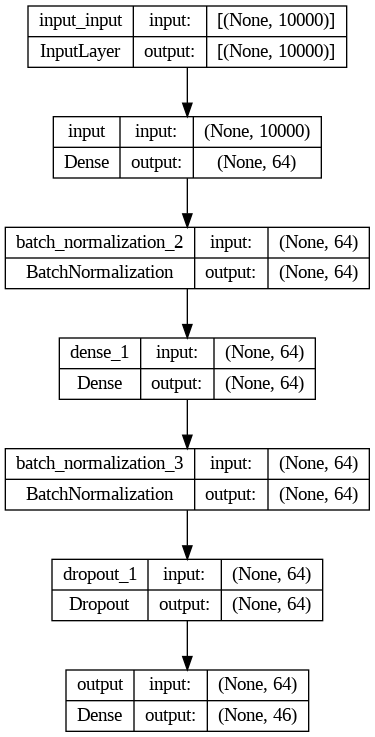

In [9]:
utils.plot_model(model, show_shapes=True)

## 학습

In [10]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_checkpoint = callbacks.ModelCheckpoint('best_reuters_model.h5', save_best_only=True)
early_stopping = callbacks.EarlyStopping(patience=10)

history = model.fit(x_train, y_train, epochs=50, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/50
14/14 [==============================] - 3s 147ms/step - loss: 3.2650 - accuracy: 0.2991 - val_loss: 3.5550 - val_accuracy: 0.5565
Epoch 2/50
14/14 [==============================] - 1s 72ms/step - loss: 1.8398 - accuracy: 0.6265 - val_loss: 3.2385 - val_accuracy: 0.6612
Epoch 3/50
14/14 [==============================] - 1s 56ms/step - loss: 1.3372 - accuracy: 0.7322 - val_loss: 3.0020 - val_accuracy: 0.7044
Epoch 4/50
14/14 [==============================] - 1s 58ms/step - loss: 1.0348 - accuracy: 0.7853 - val_loss: 2.8117 - val_accuracy: 0.7133
Epoch 5/50
14/14 [==============================] - 1s 57ms/step - loss: 0.8172 - accuracy: 0.8358 - val_loss: 2.6461 - val_accuracy: 0.7199
Epoch 6/50
14/14 [==============================] - 1s 55ms/step - loss: 0.6727 - accuracy: 0.8649 - val_loss: 2.4956 - val_accuracy: 0.7137
Epoch 7/50
14/14 [==============================] - 1s 60ms/step - loss: 0.5559 - accuracy: 0.8916 - val_loss: 2.3375 - val_accuracy: 0.7262
Epoch 8/50
1

## 결과 및 평가

<ipython-input-11-ca84c560d972>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


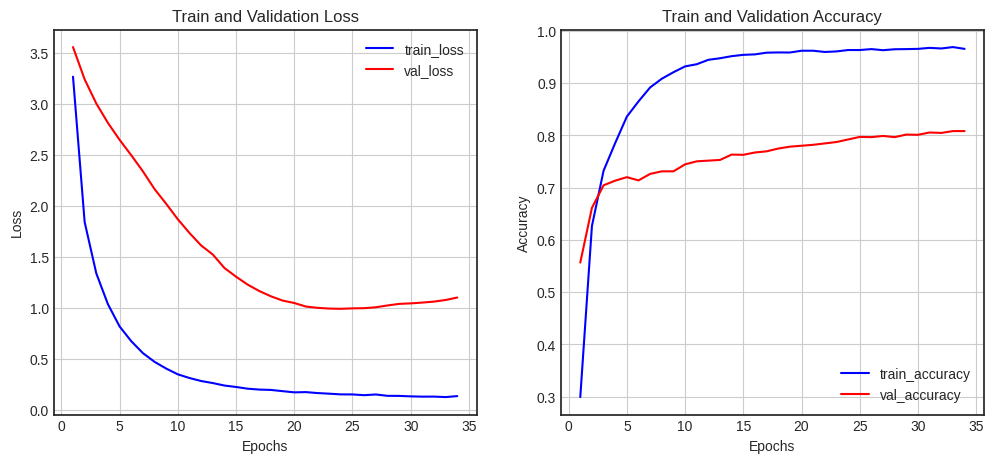

71/71 [==============================] - 0s 4ms/step - loss: 1.2185 - accuracy: 0.7912


[1.2185240983963013, 0.7911843061447144]

In [11]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)